## Open our dataset
Lets start by opening our csf file and have a look at it

In [1]:
import pandas as pd 
df = pd.read_csv("data/gradd.csv") 
df.head()

,x,y
0,204,100
1,390,198
2,399,197
3,440,220
4,455,225


Now copy out our X and y columns into series

In [2]:
import numpy as np
X = np.matrix(df["x"].to_numpy()).transpose() 
y = np.matrix(df["y"].to_numpy()).transpose() 

m,n = X.shape

## Normalise X
Now, lets normalise X so the values lie between -1 and 1. We do this so we can get all features into a similar range. We use the following equation  
$X_{(i)} = \frac{x_{(i)}-mean(x)}{max(x)-min(x)}$

In [4]:
mu = X.mean() # 
sigma = X.std() # standard deviation: max(x)-min(x)
xn = (X - mu) / sigma
#xn2 = (X - X.mean()) / (X.max() - X.min())

Add a column of ones to X for easier matric manipulation of our hypothesis and cost function later

In [6]:

xo = np.matrix(np.hstack((np.ones((m,1)),xn)))

## Gradient descent

Create the variables we need for gradient descent

In [7]:
repeat = 100
lrate = 0.5
theta = np.matrix([0,0]).transpose()
costhistory = np.zeros((repeat,1))


We now go into our gradient descent loop, where we calculate a new theta on each loop and keep track of its cost.  
Repeat untill convergance {  
&nbsp;&nbsp;&nbsp;&nbsp;`First calculate the hypothesis and then its cost with equation`  
&nbsp;&nbsp;&nbsp;&nbsp;$hc^{(i)} = h\theta(x^{(i)}) -y^{(i)}$  

&nbsp;&nbsp;&nbsp;&nbsp;`Calculate new thetas using the learning rate. This equation is made easier with matrix`  
&nbsp;&nbsp;&nbsp;&nbsp;`manipulation and the fact that we added a column of ones to X`  
&nbsp;&nbsp;&nbsp;&nbsp;$\theta_{n} = \theta_{n} - \alpha (\frac{1}{m}) \sum \limits _{j=1}hc^{(i)}.x^{(i)}$
  
&nbsp;&nbsp;&nbsp;&nbsp;`Keep track of the cost of the new theta as we go:`  
&nbsp;&nbsp;&nbsp;&nbsp;$J^{(i)} = (\frac{1}{2m}) \sum \limits _{j=1}(h\theta(x^{(i)}) -y^{(i)})^2$  
}

In [8]:
#costhistory = pd.DataFrame([0] * repetition, columns=['cost'])
for i in range(repeat):
    #calculate cost of hypothesis
    hc = xo * theta - y
    temp = hc.transpose() * xo
    #new theta
    theta = theta - (lrate * (1/m)) * temp.transpose() 
    #recalculate cost of hypothesis with new theta
    hc = xo * theta - y 
    costhistory[i] = (hc.transpose() * hc) / (2*m)  

## Plot the cost history
Plot the costs history from gradient descent to ensure its reducing over time. You can pick up from the graph how many repitions you need with your dataset and can adjust `repeat` variable above. You can also adjust `lrate` to 

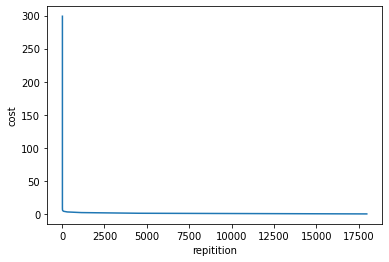

In [9]:
import matplotlib.pyplot as plt
plt.plot(costhistory,list(range(0, repeat)))
plt.ylabel('cost')
plt.xlabel('repitition')
plt.show()

## Plot the dataset and hypothesis

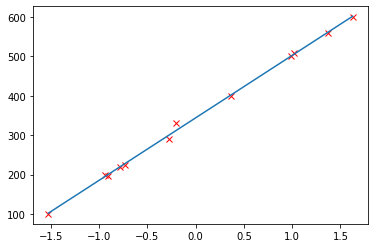

In [10]:
plt.plot(np.ravel(xn),np.ravel(y),'rx')
plt.plot([xn.min(),xn.max()], np.ravel([theta[0]+theta[1]*xn.min(),theta[0]+theta[1]*xn.max()]))